<a href="https://colab.research.google.com/github/tady0725/deeplearning/blob/my-store/08_Cifar_10_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [23]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
Y_test.shape

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


(10000, 1)

In [24]:
print(X_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [25]:
print(Y_train[0])    #6代表青蛙

[6]


Example training images and their labels: [6, 9, 9, 4, 1, 1, 2, 7, 8]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile', 'automobile', 'bird', 'horse', 'ship']


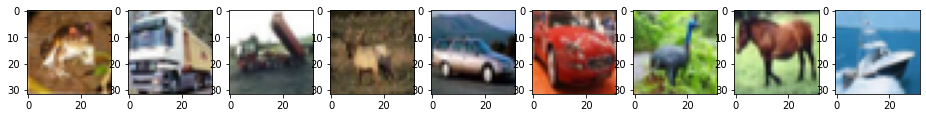

In [26]:
import matplotlib.pyplot as plt
cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in Y_train[0:9]])) 
print('Corresponding classes for the labels: ' + str([cifar_classes[x[0]] for x in Y_train[0:9]]))

f, axarr = plt.subplots(1, 9)
f.set_size_inches(16, 6)

for i in range(9):
    img = X_train[i]
    axarr[i].imshow(img)
plt.show()

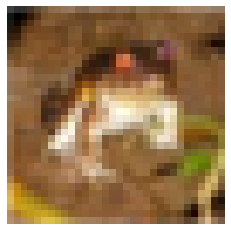

In [27]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='binary')
plt.axis("off")

plt.show()

In [28]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from tensorflow.keras.utils import to_categorical

seed = 10
np.random.seed(seed)

In [29]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
# 像素值的歸一化（到 [0-1] 範圍）

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [30]:
# Sequential 模型方法
model = Sequential()
# kernel_size: 一个整数，或者 2 个整数表示的元组或列表， 指明 2D 卷积窗口的宽度和高度。 可以是一个整数，为所有空间维度指定相同的值
# padding "valid"意味著沒有填充。"same"導致在輸入的左/右或上/下均勻填充零，以便輸出具有與輸入相同的高度/寬度尺寸。
model.add(Conv2D(32, kernel_size=(3,3), padding="same",
                 input_shape = X_train.shape[1:], activation = "relu"))

model.add(MaxPooling2D(pool_size=(2, 2)))
# avoid overfit 
# Dropout(rate, noise_shape=None, seed=None, **kwargs)
# rate between 0 and 1

# activation function softmax and  relu:整流线性单元....。

model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu"))

# 通過對輸入pool_size的每個通道的輸入窗口（大小由 定義）取最大值，沿其空間維度（高度和寬度）對輸入進行下採樣。窗口strides沿每個維度移動
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

In [32]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# 優化器
# 與compile()& 一起使用fit()
# 學習率衰減/調度
# metrics = ['accuracy']。 要为多输出模型的不同输出指定不同的评估标准，还可以传递一个字典，如 metrics = {'output_a'：'accuracy'}

In [33]:
history = model.fit(X_train, Y_train, validation_split=0.2,
                    epochs=10, batch_size=128, verbose=2)
# validation_split: 在 0 和 1 之间浮动。用作验证集的训练数据的比例。模型将分出一部分不会被训练的验证数据，并将在每一轮结束时评估这些验证数据的误差和任何其他模型指标
# epochs: 整数。训练模型迭代轮次
# batch_size:提度更新的样本数。如果未指定，默认为 32.
# 顯示 verbose: 0, 1 或 2。日志显示模式。 0 = 安静模式, 1 = 进度条, 2 = 每轮一行

Epoch 1/10
313/313 - 3s - loss: 1.7544 - accuracy: 0.3625 - val_loss: 1.4083 - val_accuracy: 0.5095
Epoch 2/10
313/313 - 2s - loss: 1.3541 - accuracy: 0.5150 - val_loss: 1.2104 - val_accuracy: 0.5823
Epoch 3/10
313/313 - 2s - loss: 1.2161 - accuracy: 0.5689 - val_loss: 1.1490 - val_accuracy: 0.6105
Epoch 4/10
313/313 - 2s - loss: 1.1112 - accuracy: 0.6054 - val_loss: 1.0116 - val_accuracy: 0.6550
Epoch 5/10
313/313 - 2s - loss: 1.0393 - accuracy: 0.6316 - val_loss: 0.9578 - val_accuracy: 0.6699
Epoch 6/10
313/313 - 2s - loss: 0.9755 - accuracy: 0.6525 - val_loss: 0.9635 - val_accuracy: 0.6573
Epoch 7/10
313/313 - 2s - loss: 0.9302 - accuracy: 0.6714 - val_loss: 0.8689 - val_accuracy: 0.6994
Epoch 8/10
313/313 - 2s - loss: 0.8883 - accuracy: 0.6866 - val_loss: 0.8636 - val_accuracy: 0.7070
Epoch 9/10
313/313 - 2s - loss: 0.8509 - accuracy: 0.6989 - val_loss: 0.8377 - val_accuracy: 0.7124
Epoch 10/10
313/313 - 2s - loss: 0.8086 - accuracy: 0.7153 - val_loss: 0.8258 - val_accuracy: 0.7168

In [34]:
loss, accuracy = model.evaluate(X_train, Y_train)
print("Training set accuracy:",accuracy)
loss, accuracy = model.evaluate(X_test, Y_test)
print("Testing set accuracy",accuracy)

1563/1563 [==============================] - 4s 3ms/step - loss: 0.6419 - accuracy: 0.7895
Training set accuracy: 0.7894999980926514
313/313 [==============================] - 1s 3ms/step - loss: 0.8393 - accuracy: 0.7056
Testing set accuracy 0.7056000232696533


In [35]:
model.save("cifar10.h5")

Predicting ...


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


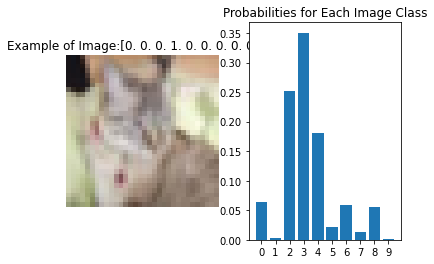

In [37]:
i = 8
img = X_test[i]
# 將圖片轉換成 4D 張量
X_test_img = img.reshape(1, 32, 32, 3).astype("float32")
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_test_img = X_test_img / 255

# 繪出圖表的預測結果
plt.figure()
plt.subplot(1,2,1)
plt.title("Example of Image:" + str(Y_test[i]))
plt.imshow(img, cmap="binary")
plt.axis("off")
# 預測結果的機率
print("Predicting ...")
probs = model.predict_proba(X_test_img, batch_size=1)
plt.subplot(1,2,2)
plt.title("Probabilities for Each Image Class")
plt.bar(np.arange(10), probs.reshape(10), align="center")
plt.xticks(np.arange(10),np.arange(10).astype(str))
plt.show()